### Solicito datos de Repsol en YahooFinance
### Dirección: https://es.finance.yahoo.com/quote/ORI?p=ORI&.tsrc=fin-srch

In [75]:
import yfinance as yf
import pandas as pd


#nombres=[ "AMZN", "CL=F", "^RUT", "BTC-USD"]  
#tipo="perdida" - "ganancia"
#inicio="2021-09-03"                                  
#final="2021-09-04"
 
# #MODO DE EJEMPLO DE COMO LLAMAR A LA FUNCIÓN: cotizaciones_yf("ganancia","2021-09-03","2021-09-04",[ "AMZN", "CL=F", "^RUT", "BTC-USD"] ):


nombre_cotizaciones=[]
valor_cotizaciones=[]
nombres_ordenados=[]
nombre_cotizaciones=[]


def cotizaciones_yf(tipo,inicio,final,nombres):
    for i in range(len(nombres)):
        df = yf.download(nombres[i], start=inicio, end=final,group_by="ticker")
        open= list(df["Open"])[0]                                                       #Obtengo los Opens
        close = list(df["Close"])[0]                                                    #Obtengos los Closes

        if open < close:
            nombre_cotizaciones.append(nombres[i])
            valor_cotizaciones.append((close/open))                 
        elif open > close:                                                              #Calculo del valor respectivo
            nombre_cotizaciones.append(nombres[i])
            valor_cotizaciones.append(((close/open)-1))
        else:
            nombre_cotizaciones.append(nombres[i])
            valor_cotizaciones.append(0)
    valor_ordenado= valor_cotizaciones.copy()
    valor_ordenado.sort()                                                              #Ordeno valores
    a=0

    for f in range(len(nombres)):
        if valor_ordenado[0]==valor_cotizaciones[f]:
            nombres_ordenados.append(nombre_cotizaciones[f])
        else:
            pass
    for r in range(len(nombres)):
        if valor_ordenado[1]==valor_cotizaciones[r]:
            nombres_ordenados.append(nombre_cotizaciones[r])
        else:
            pass                                                           #Ordeno Nombres, cada index del valor ordenado, corresponde al index del nombre correspondiente
    for a in range(len(nombres)):
        if valor_ordenado[2]==valor_cotizaciones[a]:
            nombres_ordenados.append(nombre_cotizaciones[a])
        else:
            pass
    for n in range(len(nombres)):
        if valor_ordenado[3]==valor_cotizaciones[n]:
            nombres_ordenados.append(nombre_cotizaciones[n])
        else:
            pass

                



    if tipo == "perdida":
        if valor_ordenado[0]> 0:
            #print("No hay cotizaciones con pérdida")
            devolver = []
            return devolver
        elif valor_ordenado[1]>0:
            #print("La cotización con mayor pérdida es: \n" + str(nombres_ordenados[0]) , "con una valor de " + str(valor_ordenado[0]))
            devolver = [{"Nombre":nombres_ordenados[0], "Valor":valor_ordenado[0]}]
            return devolver
        else:
            #print("Las cotizaciones con mayor pérdida son: \n" + str(nombres_ordenados[0]) , " con una valor de: ", str(valor_ordenados[0]), "\n " , str(nombres_ordenados[1]) , " con una valor de: ", str(valor_ordenado[1]))
            devolver = [{"Nombre":nombres_ordenados[0], "Valor":valor_ordenado[0]},{"Nombre":nombres_ordenados[1], "Valor":valor_ordenado[1]}]
            return devolver
    if tipo == "ganancia":
        if valor_ordenado[-1]< 0:
            devolver = []
            return devolver
        elif valor_ordenado[-2] <0:
            #print("La cotización con mayor ganancia es \n" + str(nombres_ordenados[-1]) , "con una valor de " + str(valor_ordenado[-1]))
            devolver = [{"Nombre":nombres_ordenados[-1], "Valor":valor_ordenado[-1]}]
            return devolver
        else:
            #print("Las cotizaciones con mayor pérdida son: \n" + str(nombres_ordenados[-2]) , " con una valor de: ", str(valor_ordenado[-2]), "\n " , str(nombres_ordenados[-1]) , " con una valor de: ", str(valor:ordenado[-1]) )
            devolver =[{"Nombre":nombres_ordenados[-1], "Valor":valor_ordenado[-1]},{"Nombre":nombres_ordenados[-2], "Valor":valor_ordenado[-2]}]
            return devolver


In [50]:
#Importo las librerias que voy a necesitar
import pandas as pd
import numpy as np
!pip install yfinance --upgrade --no-cache-dir


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import yfinance as yf

Repsol = yf.Ticker("ORI") # utilizo el término "ORI" como aparece en la pagina
print(Repsol.info) 

{'zip': '60601', 'sector': 'Financial Services', 'fullTimeEmployees': 9000, 'longBusinessSummary': "Old Republic International Corporation, through its subsidiaries, engages in the insurance underwriting and related services business primarily in the United States and Canada. The company operates through three segments: General Insurance, Title Insurance, and the Republic Financial Indemnity Group Run-off Business. The General Insurance segment offers automobile extended warranty, aviation, commercial automobile, commercial multi-peril, general liability, home warranty, inland marine, travel accident, and workers' compensation insurance products; and financial indemnity products for specialty coverages, including errors and omissions, fidelity, guaranteed asset protection, and surety. This segment provides its insurance products to businesses, government, and other institutions in transportation, commercial construction, healthcare, education, retail and wholesale trade, forest product

In [3]:
#Solicito e imprimo datos que aparecen indetificados arriba
print("El precio de compra es",Repsol.info['ask']) #Precio al que compro una acción
print("El precio de venta es",Repsol.info['bid']) #Precio al que vendo una acción

El precio de compra es 23.06
El precio de venta es 22.82


In [4]:
#Creo un dataframe llamado "dfrep" a partir de los datos descargados en las fechas del último mes
dfrep = yf.download("ORI MSFT", start="2021-08-18", end="2021-09-17",group_by="ticker") 
print(dfrep)

[*********************100%***********************]  2 of 2 completed
                  ORI                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2021-08-18  26.020000  26.480000  25.950001  26.120001  24.353910  2106600   
2021-08-19  26.010000  26.350000  25.900000  26.070000  24.307291  1874500   
2021-08-20  26.070000  26.540001  25.959999  26.320000  24.540388  2194800   
2021-08-23  26.520000  26.559999  26.350000  26.450001  24.661598  1486900   
2021-08-24  26.500000  26.650000  26.360001  26.430000  24.642950  1384400   
2021-08-25  26.450001  26.680000  26.370001  26.430000  24.642950  1480700   
2021-08-26  26.490000  26.600000  26.180000  26.190001  24.419178  1268000   
2021-08-27  26.190001  26.389999  26.129999  26.299999  24.521740  2428800   
2021-08-30  26.280001  26.400000  26.010000  26.260000  24.484444  196280

In [5]:
#Visualizo si el dataframe esta en tabla
dfrep.head()

ORI                                                       \
             Open       High        Low      Close  Adj Close   Volume   
Date                                                                     
2021-08-18  26.02  26.480000  25.950001  26.120001  24.353910  2106600   
2021-08-19  26.01  26.350000  25.900000  26.070000  24.307291  1874500   
2021-08-20  26.07  26.540001  25.959999  26.320000  24.540388  2194800   
2021-08-23  26.52  26.559999  26.350000  26.450001  24.661598  1486900   
2021-08-24  26.50  26.650000  26.360001  26.430000  24.642950  1384400   

                  MSFT                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-08-18  292.040009  294.820007  290.269989  290.730011  290.730011   
2021-08-19  288.690002  297.470001  288.640015  296.769989  296.769989   
2021-08-20  299.720001  305.839996  298.059998  304.359985  304.359985   
2021-08-23  303.250000  305.399994  301.850006  304.649994  304.649994   
2021-08-24  305.019989  305.649994  302.000000  302.619995  302.619995   

                      
              Volume  
Date                  
2021-08-18  21813000  
2021-08-19  29850500  
2021-08-20  40796100  
2021-08-23  22830200  
2021-08-24  18175800

In [6]:
#Visualizo con un gráfico el movimiento del último mes
ticker = yf.Ticker('ORI')
#Veo el periódo dentro de un mes "1M" y detallo las fechas a continuación
aapl_df = ticker.history(period= "1M",start="2021-08-18", end="2021-09-17",group_by="ticker")
aapl_df['Close'].plot(title="REPSOL stock price")

### Exporto a formato CSV

In [46]:
#Elijo que mi formato sea utf-8 para que se pueda leer bien en cualquier sistema operativo
dfrep.to_csv("REPSOL.csv", encoding= "utf-8")

### DATOS DE ACCIONA S.A.

In [16]:
ACCIONA = yf.Ticker("ANA.MC") # utilizo el término "ORI" como aparece en la pagina
print(ACCIONA.info) 

{'zip': '28108', 'sector': 'Industrials', 'fullTimeEmployees': 38967, 'longBusinessSummary': 'Acciona, S.A., together with its subsidiaries, engages in the energy, infrastructure, and other businesses in Spain and internationally. The company develops, constructs, operates, and maintains wind, solar photovoltaic, solar thermal, hydro, and biomass plants. It also engages in designing, construction, maintenance, and management of infrastructure projects, including bridges, highways, motorways, roads, tunnels, railway, and metros and trams, as well as ports and water channels, airports, freight forwarding, data centers, substations, and transmission lines. In addition, the company offers event planning and management services, as well as designs, constructs, and operates drinking water treatment plants, reverse osmosis desalination plants, wastewater treatment plants, and tertiary treatment plants for water reuse; and constructs, operates, and manages health infrastructure, and academic i

In [9]:
#Solicito e imprimo datos que aparecen indetificados arriba
print("El precio de compra es",ACCIONA.info['ask']) #Precio al que compro una acción
print("El precio de venta es",ACCIONA.info['bid']) #Precio al que vendo una acción

El precio de compra es 147.4
El precio de venta es 147.3


In [63]:
#Creo un dataframe llamado "dfrep" a partir de los datos descargados en las fechas del último mes
dacciona = yf.download("ANA.MC MSFT", start="2021-08-25", end="2021-09-25",group_by="ticker") 
print(dacciona)

[*********************100%***********************]  2 of 2 completed
                  MSFT                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-08-25  304.299988  304.589996  300.420013  302.010010  302.010010   
2021-08-26  300.989990  302.429993  298.950012  299.089996  299.089996   
2021-08-27  298.989990  300.869995  296.829987  299.720001  299.720001   
2021-08-30  301.119995  304.220001  301.059998  303.589996  303.589996   
2021-08-31  304.420013  304.500000  301.500000  301.880005  301.880005   
2021-09-01  302.869995  305.190002  301.489990  301.829987  301.829987   
2021-09-02  302.200012  303.359985  300.179993  301.149994  301.149994   
2021-09-03  300.989990  302.600006  300.260010  301.140015  301.140015   
2021-09-06         NaN         NaN         NaN         NaN         NaN   
2021-09-07  301.010010  301.089996  298.200

In [66]:
dacciona

MSFT                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-08-25  304.299988  304.589996  300.420013  302.010010  302.010010   
2021-08-26  300.989990  302.429993  298.950012  299.089996  299.089996   
2021-08-27  298.989990  300.869995  296.829987  299.720001  299.720001   
2021-08-30  301.119995  304.220001  301.059998  303.589996  303.589996   
2021-08-31  304.420013  304.500000  301.500000  301.880005  301.880005   
2021-09-01  302.869995  305.190002  301.489990  301.829987  301.829987   
2021-09-02  302.200012  303.359985  300.179993  301.149994  301.149994   
2021-09-03  300.989990  302.600006  300.260010  301.140015  301.140015   
2021-09-06         NaN         NaN         NaN         NaN         NaN   
2021-09-07  301.010010  301.089996  298.200012  300.179993  300.179993   
2021-09-08  299.779999  300.609985  297.470001  300.209991  300.209991   
2021-09-09  300.820007  302.140015  297.000000  297.250000  297.250000   
2021-09-10  298.420013  299.920013  295.380005  295.709991  295.709991   
2021-09-13  297.549988  298.540009  294.079987  296.989990  296.989990   
2021-09-14  299.559998  301.390015  298.100006  299.790009  299.790009   
2021-09-15  303.260010  305.320007  301.820007  304.820007  304.820007   
2021-09-16  303.760010  305.309998  300.760010  305.220001  305.220001   
2021-09-17  304.170013  304.500000  299.529999  299.869995  299.869995   
2021-09-20  296.329987  298.720001  289.519989  294.299988  294.299988   
2021-09-21  295.690002  297.540009  294.070007  294.799988  294.799988   
2021-09-22  296.730011  300.220001  294.510010  298.579987  298.579987   
2021-09-23  298.850006  300.899994  297.529999  299.559998  299.559998   
2021-09-24  298.230011  299.799988  296.929993  299.350006  299.350006   

                            ANA.MC                                      \
                Volume        Open        High         Low       Close   
Date                                                                     
2021-08-25  20006100.0  139.500000  141.500000  139.300003  140.100006   
2021-08-26  17666100.0  139.100006  139.199997  136.699997  136.899994   
2021-08-27  22597000.0  138.199997  138.699997  136.800003  137.000000   
2021-08-30  16348100.0  137.600006  139.800003  137.600006  137.899994   
2021-08-31  26285300.0  138.000000  139.899994  137.500000  137.600006   
2021-09-01  18983800.0  139.699997  141.000000  138.600006  139.800003   
2021-09-02  16285600.0  140.000000  142.600006  139.500000  142.199997   
2021-09-03  14747900.0  143.000000  143.600006  140.800003  141.600006   
2021-09-06         NaN  141.100006  142.000000  140.399994  141.000000   
2021-09-07  17180400.0  140.600006  141.000000  139.300003  140.000000   
2021-09-08  15046800.0  139.899994  141.399994  137.500000  141.199997   
2021-09-09  19927000.0  140.899994  143.500000  140.100006  143.399994   
2021-09-10  19619400.0  143.600006  144.000000  142.399994  143.699997   
2021-09-13  23652900.0  144.600006  149.500000  144.600006  148.100006   
2021-09-14  21853400.0  148.199997  149.600006  147.000000  148.000000   
2021-09-15  28356300.0  147.000000  148.899994  145.199997  146.000000   
2021-09-16  19550800.0  146.199997  147.000000  137.600006  141.000000   
2021-09-17  41309300.0  141.600006  145.899994  141.600006  144.100006   
2021-09-20  38278700.0  142.500000  142.600006  139.399994  139.899994   
2021-09-21  22364100.0  141.100006  145.699997  140.199997  145.000000   
2021-09-22  26626300.0  145.600006  146.800003  143.399994  144.600006   
2021-09-23  18604600.0  146.000000  146.800003  145.399994  145.699997   
2021-09-24  14994200.0  145.100006  148.000000  145.100006  147.199997   

                                
             Adj Close  Volume  
Date                            
2021-08-25  140.100006   69982  
2021-08-26  136.899994   47073  
202

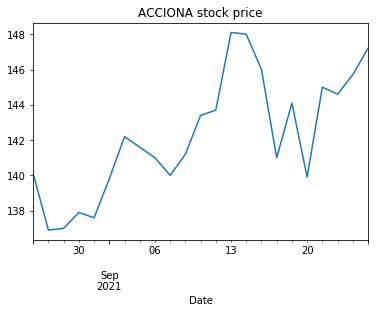

In [25]:
#Visualizo con un gráfico el movimiento del último mes
ticker = yf.Ticker('ANA.MC')
#Veo el periódo dentro de un mes "1M" y detallo las fechas a continuación
aapl_df = ticker.history(period= "1M",start="2021-08-25", end="2021-09-25",group_by="ticker")
aapl_df['Close'].plot(title="ACCIONA stock price")

In [26]:
#Elijo que mi formato sea utf-8 para que se pueda leer bien en cualquier sistema operativo
dacciona.to_csv("ACCIONA.csv", encoding= "utf-8")

###  Banco Bilbao Vizcaya Argentaria, S.A (BBVA.MC)

In [30]:
BBILBAO = yf.Ticker("BBVA.MC")
print(BBILBAO.info)

{'zip': '48005', 'sector': 'Financial Services', 'fullTimeEmployees': 123174, 'longBusinessSummary': 'Banco Bilbao Vizcaya Argentaria, S.A., together with its subsidiaries, provides retail banking, wholesale banking, asset management, and private banking services. It offers current accounts; and demand, savings, overnight, time, term, and subordinated deposits. The company also provides loan products; deals in securities; and manages pension funds. In addition, it offers credit cards; corporate and investment banking services; insurance products and services; and real estate services. The company provides its products through online and mobile channels. As of December 31, 2020, it operated through a network of 7,432 branches and 31, 000 ATMs in approximately 30 countries. It operates in Spain, Mexico, South America, the United States, Turkey, the Asia-Pacific, and rest of Europe. Banco Bilbao Vizcaya Argentaria, S.A. was founded in 1857 and is headquartered in Bilbao, Spain.', 'city': 

In [31]:
#Solicito e imprimo datos que aparecen indetificados arriba
print("El precio de compra es",BBILBAO.info['ask']) #Precio al que compro una acción
print("El precio de venta es",BBILBAO.info['bid']) #Precio al que vendo una acción

El precio de compra es 5.66
El precio de venta es 5.658


In [84]:
#Creo un dataframe llamado "DBILBAO" a partir de los datos descargados en las fechas del último mes
DBILBAO = yf.download("BBVA.MC MSFT", start="2021-08-25", end="2021-09-25",group_by="ticker") 
print(DBILBAO)

[*********************100%***********************]  2 of 2 completed
           BBVA.MC                                                  MSFT  \
              Open   High    Low  Close Adj Close     Volume        Open   
Date                                                                       
2021-08-25   5.514  5.723  5.508  5.707     5.707   16087675  304.299988   
2021-08-26   5.684  5.709  5.603  5.613     5.613   10038040  300.989990   
2021-08-27   5.600  5.612  5.508  5.580     5.580    7953758  298.989990   
2021-08-30   5.589  5.620  5.527  5.535     5.535    5222088  301.119995   
2021-08-31   5.535  5.575  5.471  5.547     5.547   18690447  304.420013   
2021-09-01   5.624  5.688  5.602  5.637     5.637   13229785  302.869995   
2021-09-02   5.650  5.673  5.560  5.609     5.609   15794366  302.200012   
2021-09-03   5.640  5.666  5.565  5.568     5.568   15224363  300.989990   
2021-09-06   5.589  5.636  5.556  5.564     5.564    4133474         NaN   
2021-09-07   5.564 

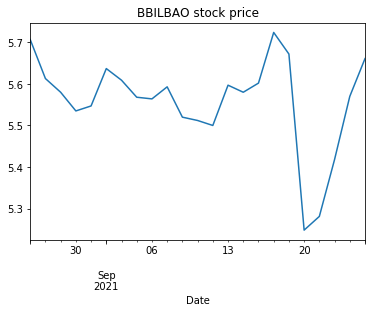

In [33]:
#Visualizo con un gráfico el movimiento del último mes
ticker = yf.Ticker('BBVA.MC')
#Veo el periódo dentro de un mes "1M" y detallo las fechas a continuación
aapl_df = ticker.history(period= "1M",start="2021-08-25", end="2021-09-25",group_by="ticker")
aapl_df['Close'].plot(title="BBILBAO stock price")

In [39]:
DBILBAO.to_csv("BILBAO.csv", encoding= "utf-8")

### Grifols, S.A. (GRF.MC)

In [35]:
GRIFOLS = yf.Ticker("GRF.MC")
print(GRIFOLS.info)

{'zip': '08174', 'sector': 'Healthcare', 'fullTimeEmployees': 23431, 'longBusinessSummary': 'Grifols, S.A. engages in the procurement, manufacture, preparation, and sale of therapeutic products primarily hemoderivatives. The company operates through Bioscience, Hospital, Diagnostic, Bio Supplies, and Others segments. The Bioscience segment produces plasma-derived medicines for the treatment of rare, chronic, and life-threatening conditions. It offers intravenous immunoglobin, albumin, alpha-1-antitrypsin, factor VIII, antithrombin, and other specialty hyperimmune immunoglobulins. The Hospital segment offers non-biological pharmaceutical products and medical supplies for hospital pharmacy, such as intravenous solutions, pharmatech solutions, clinical nutrition products, and medical devices for interventional therapy. The Diagnostic segment manufactures and markets diagnostic testing equipment, reagents, and other equipment. The Bio Supplies segment provides biological products for non-t

In [36]:
print("El precio de compra es",GRIFOLS.info['ask']) #Precio al que compro una acción
print("El precio de venta es",GRIFOLS.info['bid']) #Precio al que vendo una acción

El precio de compra es 21.9
El precio de venta es 21.88


In [68]:
DGRIFOLS= yf.download("GRF.MC MSFT", start="2021-08-25", end="2021-09-25",group_by="ticker") 
print(DGRIFOLS)

[*********************100%***********************]  2 of 2 completed
               GRF.MC                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2021-08-25  20.799999  21.040001  20.610001  20.660000  20.660000  1000258   
2021-08-26  20.680000  20.730000  20.280001  20.320000  20.320000   442773   
2021-08-27  20.299999  20.549999  20.260000  20.549999  20.549999   522587   
2021-08-30  20.570000  20.770000  20.400000  20.670000  20.670000   403773   
2021-08-31  20.629999  20.870001  20.480000  20.690001  20.690001   794317   
2021-09-01  20.870001  21.160000  20.770000  20.900000  20.900000   590321   
2021-09-02  20.980000  21.320000  20.889999  21.030001  21.030001   980998   
2021-09-03  21.110001  21.150000  20.809999  20.920000  20.920000   612726   
2021-09-06  21.010000  21.070000  20.889999  21.070000  21.070000   27150

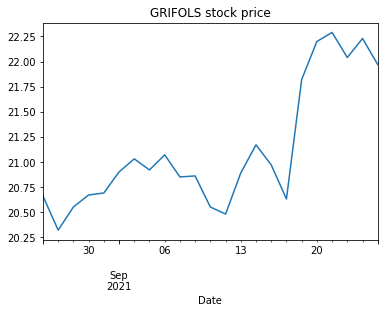

In [38]:
ticker = yf.Ticker('GRF.MC')
#Veo el periódo dentro de un mes "1M" y detallo las fechas a continuación
aapl_df = ticker.history(period= "1M",start="2021-08-25", end="2021-09-25",group_by="ticker")
aapl_df['Close'].plot(title="GRIFOLS stock price")

In [40]:
#EXPORTAR  A CSV
DGRIFOLS.to_csv("DGRIFOLS.csv", encoding= "utf-8")

### ENDESA SA (ELE.MC) 

In [41]:
ENDESA= yf.Ticker("ELE.MC")
print(ENDESA.info)

{'zip': '28042', 'sector': 'Utilities', 'fullTimeEmployees': 9274, 'longBusinessSummary': 'Endesa, S.A. engages in the generation, distribution, and sale of electricity primarily in Spain and Portugal. The company generates electricity from various energy sources, such as hydroelectric, nuclear, thermal, wind, and solar. As of December 31, 2020, its distributed electricity to approximately 21 million populations covering a total area of approximately 195,488 square kilometers. The company distribution and transmission networks comprise 315,365 kilometers. It also sells energy, as well as provides energy related commercial services. The company also engages in installation, maintenance, and repair services of electricity, gas, and air conditioning; servicing of individual domestic hot water boilers, and electrical repair services. In addition, it is also involved in the supply of electricity and gas to other European markets, including Germany, France, Belgium, France, and the Netherlan

In [42]:
print("El precio de compra es",ENDESA.info['ask']) #Precio al que compro una acción
print("El precio de venta es",ENDESA.info['bid']) #Precio al que vendo una acción

El precio de compra es 18.14
El precio de venta es 18.13


In [69]:
DENDESA= yf.download("ELE.MC MSFT", start="2021-08-25", end="2021-09-25",group_by="ticker") 
print(DENDESA)

[*********************100%***********************]  2 of 2 completed
               ELE.MC                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2021-08-25  20.879999  20.879999  20.510000  20.510000  20.510000   658763   
2021-08-26  20.480000  20.490000  20.090000  20.090000  20.090000  1280780   
2021-08-27  20.160000  20.209999  20.049999  20.059999  20.059999   508897   
2021-08-30  20.049999  20.180000  19.965000  20.100000  20.100000   956849   
2021-08-31  20.219999  20.469999  20.170000  20.360001  20.360001  1629023   
2021-09-01  20.500000  20.860001  20.469999  20.799999  20.799999  1281055   
2021-09-02  20.770000  20.980000  20.730000  20.850000  20.850000  1036204   
2021-09-03  21.129999  21.389999  20.700001  20.809999  20.809999  1760268   
2021-09-06  20.790001  20.940001  20.600000  20.740000  20.740000   54908

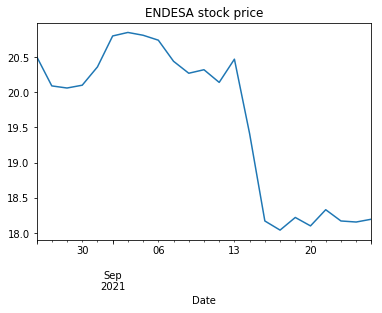

In [44]:
ticker = yf.Ticker('ELE.MC')
#Veo el periódo dentro de un mes "1M" y detallo las fechas a continuación
aapl_df = ticker.history(period= "1M",start="2021-08-25", end="2021-09-25",group_by="ticker")
aapl_df['Close'].plot(title="ENDESA stock price")

In [61]:
pd.options.display.max_columns = None # SOlicito a pandas que me muestre todas las columnas y 
#no me aparezcan puntos suspensivos al medio
pd.set_option("max_rows", None)

In [76]:
Combinados = pd.concat([DENDESA, DGRIFOLS,DBILBAO,dacciona,dfrep], axis = 0)
Combinados.head()

ANA.MC                              BBVA.MC                      \
           Adj Close Close High Low Open Volume Adj Close Close High Low Open   
Date                                                                            
2021-08-25       NaN   NaN  NaN NaN  NaN    NaN       NaN   NaN  NaN NaN  NaN   
2021-08-26       NaN   NaN  NaN NaN  NaN    NaN       NaN   NaN  NaN NaN  NaN   
2021-08-27       NaN   NaN  NaN NaN  NaN    NaN       NaN   NaN  NaN NaN  NaN   
2021-08-30       NaN   NaN  NaN NaN  NaN    NaN       NaN   NaN  NaN NaN  NaN   
2021-08-31       NaN   NaN  NaN NaN  NaN    NaN       NaN   NaN  NaN NaN  NaN   

                      ELE.MC                                              \
           Volume  Adj Close      Close       High        Low       Open   
Date                                                                       
2021-08-25    NaN  20.510000  20.510000  20.879999  20.510000  20.879999   
2021-08-26    NaN  20.090000  20.090000  20.490000  20.090000  20.480000   
2021-08-27    NaN  20.059999  20.059999  20.209999  20.049999  20.160000   
2021-08-30    NaN  20.100000  20.100000  20.180000  19.965000  20.049999   
2021-08-31    NaN  20.360001  20.360001  20.469999  20.170000  20.219999   

                         GRF.MC                                   MSFT  \
               Volume Adj Close Close High Low Open Volume   Adj Close   
Date                                                                     
2021-08-25   658763.0       NaN   NaN  NaN NaN  NaN    NaN  302.010010   
2021-08-26  1280780.0       NaN   NaN  NaN NaN  NaN    NaN  299.089996   
2021-08-27   508897.0       NaN   NaN  NaN NaN  NaN    NaN  299.720001   
2021-08-30   956849.0       NaN   NaN  NaN NaN  NaN    NaN  303.589996   
2021-08-31  1629023.0       NaN   NaN  NaN NaN  NaN    NaN  301.880005   

                                                                        \
                 Close        High         Low        Open      Volume   
Date                                                                     
2021-08-25  302.010010  304.589996  300.420013  304.299988  20006100.0   
2021-08-26  299.089996  302.429993  298.950012  300.989990  17666100.0   
2021-08-27  299.720001  300.869995  296.829987  298.989990  22597000.0   
2021-08-30  303.589996  304.220001  301.059998  301.119995  16348100.0   
2021-08-31  301.880005  304.500000  301.500000  304.420013  26285300.0   

                 ORI                             
           Adj Close Close High Low Open Volume  
Date                                             
2021-08-25       NaN   NaN  NaN NaN  NaN    NaN  
2021-08-26       NaN   NaN  NaN NaN  NaN    NaN  
2021-08-27       NaN   NaN  NaN NaN  NaN    NaN  
2021-08-30       NaN   NaN  NaN NaN  NaN    NaN  
2021-08-31       NaN   NaN  NaN NaN  NaN    NaN

In [45]:
#EXPORTAR  A CSV
DENDESA.to_csv("ENDESA.csv", encoding= "utf-8")

In [89]:
def getTicker(nombre):
    accion = yf.Ticker(nombre)
    if "currentPrice" in accion.info: #Solo se consideran válidas aquellas que tengan un valor actual
        return (nombre, accion.info["longName"], accion.info["currentPrice"], accion.history)
    else:
        return []

In [90]:
Combinados = pd.concat([bilbao, endesa,repsol,dgrifols,acciona], axis = 0)
Combinados

,Unnamed: 0,MSFT,MSFT.1,MSFT.2,MSFT.3,MSFT.4,MSFT.5,BBVA.MC,BBVA.MC.1,BBVA.MC.2,BBVA.MC.3,BBVA.MC.4,BBVA.MC.5,ELE.MC,ELE.MC.1,ELE.MC.2,ELE.MC.3,ELE.MC.4,ELE.MC.5,ORI,ORI.1,ORI.2,ORI.3,ORI.4,ORI.5,GRF.MC,GRF.MC.1,GRF.MC.2,GRF.MC.3,GRF.MC.4,GRF.MC.5,ANA.MC,ANA.MC.1,ANA.MC.2,ANA.MC.3,ANA.MC.4,ANA.MC.5
0,NaN,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-25,304.29998779296875,304.5899963378906,300.4200134277344,302.010009765625,302.010009765625,20006100.0,5.513999938964844,5.7230000495910645,5.507999897003174,5.706999778747559,5.706999778747559,16087675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-26,300.989990234375,302.42999267578125,298.95001220703125,299.0899963378906,299.0899963378906,17666100.0,5.684000015258789,5.709000110626221,5.603000164031982,5.61299991607666,5.61299991607666,10038040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-27,298.989990234375,300.8699951171875,296.8299865722656,299.7200012207031,299.7200012207031,22597000.0,5.599999904632568,5.611999988555908,5.507999897003174,5.579999923706055,5.579999923706055,7953758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-08-30,301.1199951171875,304.2200012207031,301.05999755859375,303.5899963378906,303.5899963378906,16348100.0,5.589000225067139,5.619999885559082,5.5269999504089355,5.534999847412109,5.534999847412109,5222088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-08-31,304.4200134277344,304.5,301.5,301.8800048828125,301.8800048828125,26285300.0,5.534999847412109,5.574999809265137,5.4710001945495605,5.546999931335449,5.546999931335449,18690447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-09-01,302.8699951171875,305.19000244140625,301.489990234375,301.8299865722656,301.8299865722656,18983800.0,5.624000072479248,5.688000202178955,5.6020002365112305,5.63700008392334,5.63700008392334,13229785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-09-02,302.20001220703125,303.3599853515625,300.17999267578125,301.1499938964844,301.1499938964844,16285600.0,5.650000095367432,5.672999858856201,5.559999942779541,5.609000205993652,5.609000205993652,15794366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-09-03,300.989990234375,302.6000061035156,300.260009765625,301.1400146484375,301.1400146484375,14747900.0,5.639999866485596,5.665999889373779,5.565000057220459,5.567999839782715,5.567999839782715,15224363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
Combinados.to_csv("accionesyfinance.csv", encoding= "utf-8")

In [91]:
acciones = []
for l in Combinados: # variable que contiene lista de nombre de acciones 
    accion = getTicker(l.split()[0])
    if len(accion) != 0:
        acciones.append(accion)
acciones.sort(key=lambda x: x[2], reverse=True)

In [93]:
df_todasacciones = pd.DataFrame(np.array(acciones)[:, :3], columns=['Acción', 'Nombre', 'Valor'])
df_todasacciones

,Acción,Nombre,Valor
0,MSFT,Microsoft Corporation,299.35
1,ANA.MC,"Acciona, S.A.",144.6
2,ORI,Old Republic International Corporation,22.87
3,GRF.MC,"Grifols, S.A.",22.04
4,ELE.MC,"Endesa, S.A.",18.17
5,BBVA.MC,"Banco Bilbao Vizcaya Argentaria, S.A.",5.418
